In [4]:
import numpy as np 
import pandas as pd
import json
import geopy
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 1)
from warnings import simplefilter
# ignore all types of warnings
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=FutureWarning)
# importing operating system
import os
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium 
print('Libraries imported.')
 # df = pd.read_csv('C://Work_Imp//DataScience//Coding//Crash_Data_Report1000RowsAccident.csv') 
df = pd.read_csv('C://Users//anand.puravangara\OneDrive - State of Rhode Island//DoA//DoIT//CloudGroup//Working//Training-AutocrashPrediction//Auto-Crash-Prediction//Auto-Crash-Prediction//Crash_Data_Report1000RowsAccident.csv')
# C:\Users\anand.puravangara\OneDrive - State of Rhode Island\DoA\DoIT\CloudGroup\Working\Training-AutocrashPrediction\Auto-Crash-Prediction\Auto-Crash-Prediction


Libraries imported.


In [5]:
df_without_accident=df[df['EventSeverity']!='Accident'].reset_index(drop=True)
print (df_without_accident.shape)
df_without_accident.head(2)
df.shape

(1001, 35)


(2001, 35)

In [6]:
df_accident=df[df['EventSeverity']!='*accident*'].reset_index(drop=True)
print (df_accident.shape)
df_accident.head(2)

(2001, 35)


,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,TotalAccidentities,EventSeverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.939444,33.419065,1101,2657937,2012/03/15 22:32:00+00,2012,10th St,Myrtle Ave,-400.224,Driveway,1,0,Accident,ANGLE (Front To Side)(Other Than Left Turn),Dusk,Clear,Dry,Driver,40,Female,Northwest,Making Right Turn,Inattention Distraction,No Apparent Influence,No Apparent Influence,Pedalcyclist,21,Female,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.419065,-111.939444
1,-111.940578,33.419056,278,2584585,2012/01/07 20:22:00+00,2012,10th St,Mill Ave,-190.080,Not Junction Related,0,0,No Accident,ANGLE (Front To Side)(Other Than Left Turn),Daylight,Clear,Dry,Driver,19,Male,Southeast,Making U Turn,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,Driver,42,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.419056,-111.940578


In [7]:
df_accident1=df_accident.head(1000)
df_without_accident1=df_without_accident.head(1000)

In [8]:
df['EventSeverity'].unique().tolist()

['Accident', 'No Accident']

In [9]:
df['Latitude']=df[['Latitude']].astype(float)
df['Longitude']=df[['Longitude']].astype(float)
df=df.dropna(subset=['Latitude', 'Longitude','CrossStreet'])
df.isnull().sum()

X                      0
Y                      0
OBJECTID               0
Incidentid             0
DateTime               0
Year                   0
StreetName             0
CrossStreet            0
Distance               0
JunctionRelation       0
Totalinjuries          0
TotalAccidentities     0
EventSeverity          0
Collisionmanner        0
Lightcondition         0
Weather                0
SurfaceCondition       0
Unittype_One           0
Age_Drv1               0
Gender_Drv1            0
Traveldirection_One    0
Unitaction_One         0
Violation1_Drv1        0
AlcoholUse_Drv1        0
DrugUse_Drv1           0
Unittype_Two           0
Age_Drv2               0
Gender_Drv2            0
Traveldirection_Two    0
Unitaction_Two         0
Violation1_Drv2        0
AlcoholUse_Drv2        0
DrugUse_Drv2           0
Latitude               0
Longitude              0
dtype: int64

In [10]:
#City of Tempe
latitude = 33.427204
longitude = -111.939896
map_test1 = folium.Map(location=[latitude,longitude], zoom_start=13, tiles='Stamen Terrain')
df_accident1=df_accident.head(1000)
incidents_accident = folium.map.FeatureGroup()
latitudes = list(filter(None,df_accident1.Latitude))
longitudes = list(filter(None,df_accident1.Longitude))
latitudes = list(df_accident1.Latitude)
longitudes = list(df_accident1.Longitude)
labels = list(df_accident1.EventSeverity)
#df_accident1.head(2)
#for lat, lng, label in zip(latitudes, longitudes, labels):
for lat, lng, label in zip(latitudes, longitudes, labels,):
     #folium.CircleMarker([lat, lng], popup=label,color='blue',fill=True).add_to(map_test)
    folium.CircleMarker(location=[lat,lng], color='blue',fill=True, popup=label).add_to(map_test1)
# add incidents to map
map_test1.add_child(incidents_accident)
map_test1


In [11]:
# Creating a cloumn featuring binary values on the basis of accident risks
df['EVENT'] =[0 if x=="Accident" in x else 1 for x in df['EventSeverity']]
df['EVENT'].head(10)

0    0
1    1
2    1
3    1
4    1
5    1
6    0
7    1
8    1
9    0
Name: EVENT, dtype: int64

In [12]:
df1=df[['EventSeverity','Latitude','Longitude','CrossStreet', 'EVENT']]

In [13]:
df1.dtypes

EventSeverity    object 
Latitude         float64
Longitude        float64
CrossStreet      object 
EVENT            int64  
dtype: object

In [14]:
df1= df1.head(1000)

In [15]:
colordict = {1: 'red', 0: 'yellow'}

In [16]:
# create map using latitude and longitude values
latitude = 33.427204
longitude = -111.939896
map_test2 = folium.Map(location=[latitude,longitude], zoom_start=12, tiles='OpenStreetMap')
labels = list(df1.CrossStreet)
incidents = folium.map.FeatureGroup()
for lat, lon, traffic_q, label, in zip(df1['Latitude'], df1['Longitude'], df1['EVENT'], df1['CrossStreet']):
    folium.CircleMarker(
    [lat, lon],
    radius=5,
    popup = (label ),
    color='r',
    key_on = traffic_q,
    threshold_scale=[0,1],
    fill_color=colordict[traffic_q],
    fill=True,
    fill_opacity=0.7
    ).add_to(map_test2)
map_test2.add_child(incidents)
map_test2

In [17]:
df_sample=df[['EventSeverity', 'Latitude']]
df_sample.head(2)

,EventSeverity,Latitude
0,Accident,33.419065
1,No Accident,33.419056


In [18]:
df_sample.set_index(['Latitude'],inplace=True)
df_sample.head(2)

,EventSeverity
Latitude,
33.419065,Accident
33.419056,No Accident


In [19]:
event_result=df_sample.groupby(level=['Latitude'], sort=False).agg(','.join)


In [20]:
event_result.head(2)

,EventSeverity
Latitude,
33.419065,Accident
33.419056,No Accident


In [21]:
event_result=event_result.reset_index()
event_result.head()

,Latitude,EventSeverity
0,33.419065,Accident
1,33.419056,No Accident
2,33.418915,No Accident
3,33.417791,No Accident
4,33.417778,No Accident


In [22]:
event_result['EVENT'] =[1 if x=="*Accident*" in x else 0 for x in event_result['EventSeverity']]
event_result.head(2)

,Latitude,EventSeverity,EVENT
0,33.419065,Accident,0
1,33.419056,No Accident,0


In [23]:
df2_sample=df[['EventSeverity', 'Longitude']]
#df2_sample.head(2)
df2_sample.set_index(['Longitude'],inplace=True)
event_result2=df2_sample.groupby(level=['Longitude'], sort=False).agg(','.join)
event_result2.head(2)
event_result2=event_result2.reset_index()
event_result2.head(2)

,Longitude,EventSeverity
0,-111.939444,Accident
1,-111.940578,No Accident


In [24]:
event_result2.shape

(1916, 2)

In [25]:
event_result.rename(columns={'EventSeverity':'Event Severity','Lattitude':'Lattitude', 'EVENT':'ACCIDENT_RISK'},inplace=True)
frame1=[df,event_result]
frames_main=pd.concat(frame1, axis=1, sort=False)
frames_main.head(2)

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,TotalAccidentities,EventSeverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude,EVENT,Latitude,Event Severity,ACCIDENT_RISK
0,-111.939444,33.419065,1101,2657937,2012/03/15 22:32:00+00,2012,10th St,Myrtle Ave,-400.224,Driveway,1,0,Accident,ANGLE (Front To Side)(Other Than Left Turn),Dusk,Clear,Dry,Driver,40,Female,Northwest,Making Right Turn,Inattention Distraction,No Apparent Influence,No Apparent Influence,Pedalcyclist,21,Female,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.419065,-111.939444,0,33.419065,Accident,0.0
1,-111.940578,33.419056,278,2584585,2012/01/07 20:22:00+00,2012,10th St,Mill Ave,-190.080,Not Junction Related,0,0,No Accident,ANGLE (Front To Side)(Other Than Left Turn),Daylight,Clear,Dry,Driver,19,Male,Southeast,Making U Turn,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,Driver,42,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.419056,-111.940578,1,33.419056,No Accident,0.0


In [26]:
#droping
frames_main.drop(['Latitude', 'EventSeverity'], axis=1, inplace=True)
#frames_main.head(2)

In [27]:
main=frames_main[['Event Severity', 'ACCIDENT_RISK']]
main.head(2)

,Event Severity,ACCIDENT_RISK
0,Accident,0.0
1,No Accident,0.0


In [28]:
main.rename(columns={'Event Severity':'EventSeverity'},inplace=True)
main.head(1)

C:\Users\anand.puravangara\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,EventSeverity,ACCIDENT_RISK
0,Accident,0.0


In [29]:
#main.isnull().sum()
#main=main.dropna(subset=['EventSeverity', 'ACCIDENT_RISK'])
#main.isnull().sum()

#!pip  install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org  --upgrade pixiedust
import pixiedust

ModuleNotFoundError: No module named 'pixiedust'

In [88]:
main.isnull().sum()

EventSeverity    12
ACCIDENT_RISK    12
dtype: int64

In [89]:
main=main.dropna(subset=['EventSeverity', 'ACCIDENT_RISK'])
main.isnull().sum()

EventSeverity    0
ACCIDENT_RISK    0
dtype: int64

In [90]:
#!pip install --upgrade pixiedust
import pixiedust

In [91]:
main['EventSeverity'] = main['EventSeverity'].astype('category')
main['EventSeverity'] = main['EventSeverity'].cat.codes

In [92]:
main.head(2)

,EventSeverity,ACCIDENT_RISK
0,0,0.0
1,4,0.0


In [93]:
main['EventSeverity']=main['EventSeverity'].astype(int)
x=main['EventSeverity']/max(main['EventSeverity'])
#print (x)


Text(0.5, 1.0, 'EVENTS VS RISKS')

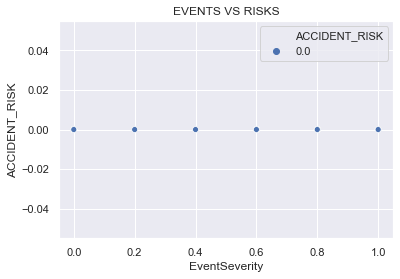

In [94]:
import seaborn as sns; sns.set()
ax = sns.scatterplot(x=x, y="ACCIDENT_RISK", hue="ACCIDENT_RISK", data=main)
ax.set_title("EVENTS VS RISKS")

Text(0.5, 1.0, 'EVENTS VS RISKS')

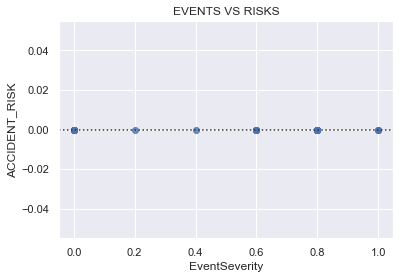

In [95]:
# we can also see residual plot
ax=sns.residplot(x=x, y='ACCIDENT_RISK', data=main)
ax.set_title("EVENTS VS RISKS")

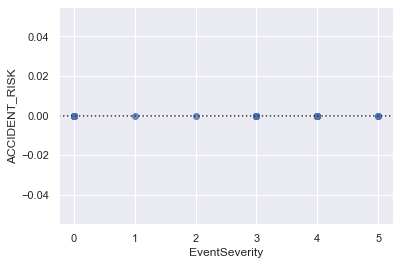

In [96]:
sns.residplot(x='EventSeverity', y='ACCIDENT_RISK', data=main)

In [97]:
X = main['EventSeverity'].values
Y = main['ACCIDENT_RISK'].values

In [98]:
print (X)
print (Y)

[0 4 4 ... 4 0 4]
[0. 0. 0. ... 0. 0. 0.]


In [99]:
# Normalize
X=X/max(X)

In [100]:
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org keras

In [101]:
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org tensorflow

In [102]:
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org Adam

In [103]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD
from sklearn.model_selection import train_test_split


In [104]:
# seed for reproducing same results
seed = 20
np.random.seed(seed)
# split the data into training (80%) and testing (20%)
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.20, random_state=seed)

In [105]:
# create the model
model = Sequential()
model.add(Dense(1, input_dim=1, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# compile the model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['acc'])
# fit the model
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50,batch_size=512,verbose=1)

Epoch 1/50
4/4 [==============================] - 0s 48ms/step - loss: 0.6913 - acc: 1.0000 - val_loss: 0.6832 - val_acc: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 0.6814 - acc: 1.0000 - val_loss: 0.6735 - val_acc: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.6718 - acc: 1.0000 - val_loss: 0.6640 - val_acc: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 0.6623 - acc: 1.0000 - val_loss: 0.6546 - val_acc: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 0.6530 - acc: 1.0000 - val_loss: 0.6455 - val_acc: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 0.6438 - acc: 1.0000 - val_loss: 0.6365 - val_acc: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 0.6349 - acc: 1.0000 - val_loss: 0.6277 - val_acc: 1.0000
Epoch 8/50
4/4 [==============================] - 0s 11ms/step - loss: 0.6261 - acc: 1.0000 - val

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


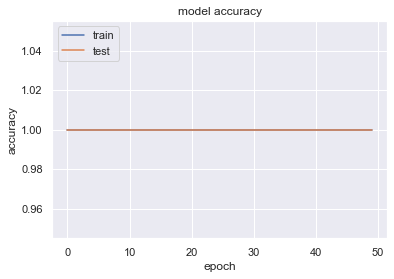

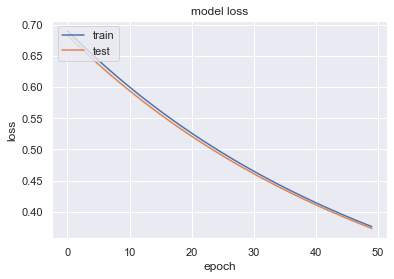

In [61]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Observation & Recommendation:   We observed that there are many places where multiple incidents.  
#It means there are chances of accident risk is involved.  

# Conclusion:  The accuracy of the model is above 90% percent.  it means the model fits well.